<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.utils import np_utils

from keras.applications.vgg16 import VGG16
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input

In [6]:
# set up base model


img_width, img_height= 32, 32
base_model= VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

nb_epoch= 10
nb_classes= 10

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train= np_utils.to_categorical(y_train, nb_classes)
y_test= np_utils.to_categorical(y_test, nb_classes)

# Extract the last layer from third block of model
last = base_model.get_layer('block5_pool').output

# Add classification layers on top of it
x = Flatten()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(base_model.input, output)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

In [7]:
model.summary()

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=nb_epoch,
          batch_size=100,
          verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("loss: %.2f" % scores[0])
print("acc: %.2f" % scores[1])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [21]:
from keras.models import load_model

In [23]:
model.save('vgg16.h5')

In [24]:
from google.colab import files
files.download('vgg16.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

Saving 0001.jpg to 0001.jpg


In [15]:
from keras.applications.vgg16 import VGG16
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from PIL import Image, ImageTk
import io

In [16]:
a = Image.open('0001.jpg')
img_pred = a.resize((32,32))
img_pred = img_to_array(img_pred)
img_pred = img_pred.reshape((1, img_pred.shape[0],img_pred.shape[1],img_pred.shape[2]))
img_pred = preprocess_input(img_pred)
pred = model.predict(img_pred)

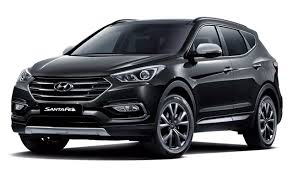

In [17]:
a

In [18]:
pred

array([[2.4166704e-08, 9.9996948e-01, 1.7870753e-10, 7.7634645e-08,
        4.7227990e-09, 4.2320125e-09, 3.0034863e-07, 4.9747402e-09,
        4.5036312e-09, 3.0075620e-05]], dtype=float32)

In [19]:
print(pred.argmax())

1


In [20]:
arr = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
arr[pred.argmax()]

'automobile'